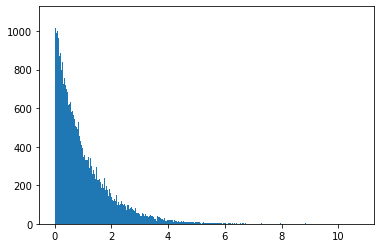

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


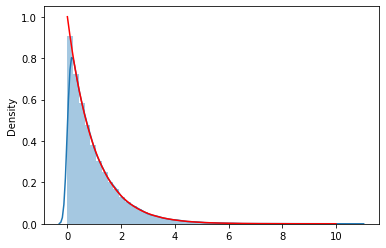

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
N = int(1e5)

# Inverse Transform Method
u = np.random.rand(N)
lam = 1.0

x = -np.log(1-u)/lam #

plt.hist(x, 1000)
plt.show()

sns.distplot(x) # simulation density (blue)
z = np.arange(0, 10, 0.01) # 0~10까지 0.01 간격으로 쪼개서 나열
plt.plot(z, lam*np.exp(-lam*z), color='red') # 이론적인 density (red)
plt.show()

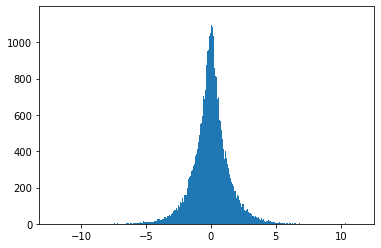

In [11]:
# -0.5 ~ 0.5사이의 난수 생성
u = np.random.rand(N) - 0.5
#u

# Acceptance-Rejection Method Exercise
x = -np.sign(u)*np.log(1-2*np.abs(u)) # Laplace Transform

plt.hist(x, 1000)
plt.show()


In [21]:
N = 1000
x = np.zeros(N)
c = np.sqrt(np.exp(1)/2*np.pi)

for i in range(N):
    # -0.5 ~ 0.5사이의 난수 생성
    u1 = np.random.rand() - 0.5

    # Acceptance-Rejection Method Exercise
    y = -np.sign(u1)*np.log(1-2*np.abs(u1)) # Laplace Transform
    

    while(True):
        u2 = np.random.rand()
        f = 1/np.sqrt(2*np.pi)*np.exp(-y*y/2)
        g = np.exp(-np.abs(y))
        if (u2 <= f/(c*g)):
            break
    
    x[i] = y


plt.hist(x)
plt.show()


KeyboardInterrupt: 

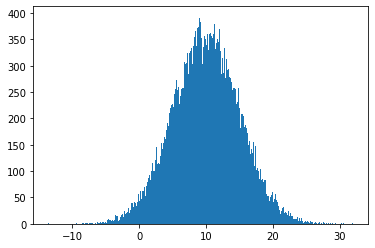

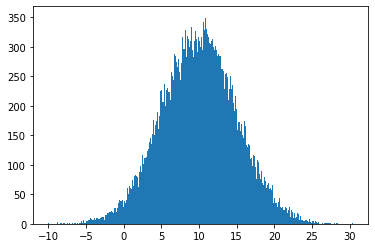

In [24]:
# AR method말고 normal/randn 함수 패키지를 활용할 예정
N = int(1e5)
Z1 = 5.0 * np.random.randn(N) + 10.0 # 정규분포 함수 randn 사용 (평균10, 시그마5.0)
Z2 = np.random.normal(loc=10.0, scale=5.0, size=N)

plt.hist(Z1, 1000)
plt.show()

plt.hist(Z2, 1000)
plt.show()

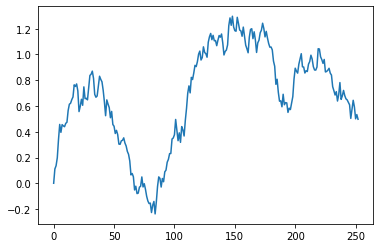

In [32]:
# Brownian Motion simulation
np.random.seed(0)

N = 252
t = np.arange(0, 1, 1/N)
dz = np.random.randn(N)*np.sqrt(1/N)
z = np.insert(np.cumsum(dz), 0, 0) # 누적합 array 0번째 인덱스에 0을 추가 :0부터 차팅하기 위함

plt.plot(z)
plt.show()

In [33]:
a = np.array([5,2,3,4])
b = np.cumsum(a)
c = np.array[b, 3]
c

TypeError: 'builtin_function_or_method' object is not subscriptable

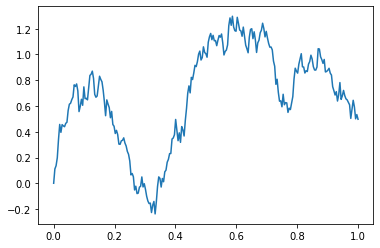

In [35]:
# 위 예제와 동일한 random number 생성 로직
np.random.seed(0)

T = 1.0
N = 252 # 하루
dt = T/N
Z = np.zeros(N+1)
t = np.zeros(N+1)

Z[0] = 0.0
t[0] = 0.0

for k in range(N):
    dZ = np.random.randn()*np.sqrt(dt)
    Z[k+1] = Z[k] + dZ
    t[k+1] = t[k] + dt
    
plt.plot(t, Z)
plt.show()